In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove.model import *

from sklearn.model_selection import KFold

In [3]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed" in f and "passage" not in f]
files

['EXP0019_MS001_processed.csv',
 'EXP0019_MS014_processed.csv',
 'EXP0019_MS008_processed.csv',
 'EXP0019_DSM27147_processed.csv']

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return pred_species, true, pred, stdv

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Total samples: 32, Updated regularization: 1.00e-03
Loss: 9.939, Residuals: -0.076
Loss: 4.817, Residuals: 0.095
Loss: 3.315, Residuals: 0.016
Loss: 3.206, Residuals: 0.061
Loss: 3.001, Residuals: 0.044
Loss: 2.658, Residuals: 0.022
Loss: 2.348, Residuals: -0.019
Loss: 2.134, Residuals: -0.004
Loss: 2.094, Residuals: 0.034
Loss: 2.024, Residuals: 0.023
Loss: 1.992, Residuals: 0.037
Loss: 1.940, Residuals: 0.025
Loss: 1.938, Residuals: 0.040
Loss: 1.917, Residuals: 0.033
Loss: 1.883, Residuals: 0.020
Loss: 1.882, Residuals: 0.024
Loss: 1.870, Residuals: 0.020
Loss: 1.850, Residuals: 0.011
Loss: 1.849, Residuals: 0.017
Loss: 1.840, Residuals: 0.012
Loss: 1.827, Residuals: 0.004
Loss: 1.825, Residuals: 0.011
Loss: 1.825, Residuals: 0.012
Evidence -208.729
Updating hyper-parameters...
Total samples: 32, Updated regularization: 1.47e-02
Loss: 8.693, Residuals: 0.013
Loss: 8.641, Residuals: -0.001
Loss: 8.629, Residuals: 0.013
Loss: 8.540, Residuals: 0.024
Loss: 8.478, Residuals: 0.035
Loss:

Loss: 1.562, Residuals: -0.039
Loss: 1.562, Residuals: -0.039
Loss: 1.562, Residuals: -0.038
Loss: 1.562, Residuals: -0.039
Loss: 1.562, Residuals: -0.039
Loss: 1.561, Residuals: -0.039
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Loss: 1.561, Residuals: -0.040
Evidence -188.973
Updating hyper-parameters...
Total samples: 35, Updated regularization: 6.24e-03
Loss: 8.532, Residuals: -0.060
Loss: 8.467, Residuals: -0.045
Lo

Loss: 5.196, Residuals: 0.004
Loss: 3.573, Residuals: 0.005
Loss: 2.663, Residuals: -0.009
Loss: 2.603, Residuals: -0.034
Loss: 2.494, Residuals: -0.026
Loss: 2.318, Residuals: -0.013
Loss: 2.167, Residuals: -0.018
Loss: 2.059, Residuals: -0.025
Loss: 2.051, Residuals: -0.014
Loss: 2.039, Residuals: -0.011
Loss: 2.021, Residuals: -0.010
Loss: 1.990, Residuals: -0.019
Loss: 1.990, Residuals: -0.020
Loss: 1.956, Residuals: -0.032
Loss: 1.941, Residuals: -0.028
Loss: 1.914, Residuals: -0.032
Loss: 1.911, Residuals: -0.021
Loss: 1.884, Residuals: -0.032
Loss: 1.884, Residuals: -0.030
Loss: 1.878, Residuals: -0.033
Loss: 1.868, Residuals: -0.038
Loss: 1.868, Residuals: -0.038
Evidence -210.090
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.19e-02
Loss: 9.943, Residuals: -0.017
Loss: 9.866, Residuals: -0.023
Loss: 9.865, Residuals: -0.022
Evidence 102.585
Updating hyper-parameters...
Total samples: 35, Updated regularization: 2.35e-02
Loss: 30.218, Residuals: -0.02

Total samples: 36, Updated regularization: 6.21e-01
Loss: 141.907, Residuals: -0.010
Loss: 141.859, Residuals: -0.011
Loss: 141.768, Residuals: -0.011
Loss: 141.612, Residuals: -0.010
Loss: 141.609, Residuals: -0.010
Evidence 475.621
Updating hyper-parameters...
Total samples: 36, Updated regularization: 6.38e-01
Loss: 142.223, Residuals: -0.010
Loss: 142.180, Residuals: -0.012
Loss: 142.100, Residuals: -0.012
Loss: 142.083, Residuals: -0.011
Loss: 141.949, Residuals: -0.011
Loss: 141.949, Residuals: -0.011
Evidence 476.145
Updating hyper-parameters...
Total samples: 36, Updated regularization: 6.48e-01
Loss: 142.429, Residuals: -0.010
Loss: 142.324, Residuals: -0.010
Loss: 142.319, Residuals: -0.011
Evidence 476.513
Pass count  1
Total samples: 36, Updated regularization: 1.00e-03
Loss: 10.114, Residuals: -0.183
Loss: 4.345, Residuals: 0.020
Loss: 3.525, Residuals: -0.008
Loss: 2.889, Residuals: -0.027
Loss: 2.583, Residuals: -0.028
Loss: 2.511, Residuals: 0.020
Loss: 2.382, Residuals

Total samples: 36, Updated regularization: 1.26e+00
Loss: 142.442, Residuals: -0.017
Loss: 142.435, Residuals: -0.018
Evidence 491.091
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.35e+00
Loss: 143.469, Residuals: -0.017
Evidence 491.995
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.38e+00
Loss: 143.141, Residuals: -0.020
Loss: 142.975, Residuals: -0.023
Evidence 491.526
Pass count  1
Fail count  1
Total samples: 36, Updated regularization: 1.00e-03
Loss: 10.567, Residuals: -0.121
Loss: 4.897, Residuals: 0.026
Loss: 3.909, Residuals: -0.000
Loss: 3.184, Residuals: -0.009
Loss: 2.503, Residuals: -0.026
Loss: 2.212, Residuals: 0.032
Loss: 2.003, Residuals: -0.014
Loss: 1.983, Residuals: 0.018
Loss: 1.946, Residuals: 0.010
Loss: 1.882, Residuals: -0.003
Loss: 1.787, Residuals: -0.025
Loss: 1.783, Residuals: -0.005
Loss: 1.749, Residuals: -0.015
Loss: 1.743, Residuals: -0.008
Loss: 1.732, Residuals: -0.013
Loss: 1.713, Residuals: -0.0

Loss: 133.970, Residuals: -0.021
Evidence 466.934
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.12e+00
Loss: 137.322, Residuals: -0.025
Loss: 137.012, Residuals: -0.025
Loss: 136.948, Residuals: -0.025
Loss: 136.838, Residuals: -0.024
Loss: 136.833, Residuals: -0.024
Evidence 468.634
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.17e+00
Loss: 137.941, Residuals: -0.023
Evidence 469.339
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.22e+00
Loss: 138.674, Residuals: -0.025
Loss: 138.498, Residuals: -0.025
Loss: 138.491, Residuals: -0.026
Evidence 470.109
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.23e+00
Loss: 138.795, Residuals: -0.025
Evidence 470.390
Pass count  1


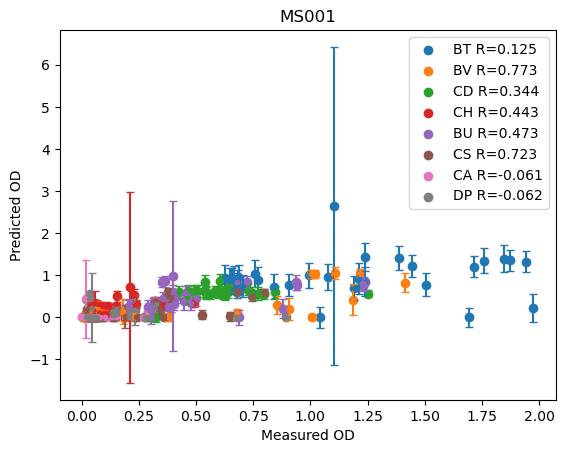

Total samples: 25, Updated regularization: 1.00e-03
Loss: 8.447, Residuals: -0.106
Loss: 3.542, Residuals: 0.024
Loss: 2.576, Residuals: 0.053
Loss: 1.826, Residuals: 0.025
Loss: 1.694, Residuals: 0.046
Loss: 1.522, Residuals: 0.032
Loss: 1.239, Residuals: 0.004
Loss: 0.919, Residuals: 0.005
Loss: 0.843, Residuals: 0.026
Loss: 0.735, Residuals: 0.006
Loss: 0.728, Residuals: 0.027
Loss: 0.674, Residuals: 0.005
Loss: 0.668, Residuals: 0.011
Loss: 0.658, Residuals: 0.005
Loss: 0.640, Residuals: -0.006
Loss: 0.640, Residuals: -0.001
Loss: 0.633, Residuals: -0.006
Loss: 0.623, Residuals: -0.014
Loss: 0.623, Residuals: -0.013
Loss: 0.614, Residuals: -0.021
Loss: 0.614, Residuals: -0.019
Loss: 0.610, Residuals: -0.022
Loss: 0.610, Residuals: -0.022
Loss: 0.608, Residuals: -0.025
Loss: 0.606, Residuals: -0.029
Loss: 0.606, Residuals: -0.029
Loss: 0.605, Residuals: -0.029
Loss: 0.604, Residuals: -0.032
Loss: 0.604, Residuals: -0.031
Loss: 0.603, Residuals: -0.032
Loss: 0.603, Residuals: -0.034


Loss: 14.402, Residuals: 0.034
Loss: 14.153, Residuals: 0.052
Loss: 14.137, Residuals: 0.056
Loss: 14.105, Residuals: 0.056
Loss: 14.049, Residuals: 0.057
Loss: 13.972, Residuals: 0.061
Loss: 13.969, Residuals: 0.059
Loss: 13.962, Residuals: 0.059
Loss: 13.951, Residuals: 0.061
Loss: 13.937, Residuals: 0.063
Loss: 13.936, Residuals: 0.063
Evidence 152.937
Updating hyper-parameters...
Total samples: 26, Updated regularization: 7.69e-01
Loss: 33.075, Residuals: 0.054
Loss: 33.009, Residuals: 0.051
Loss: 32.978, Residuals: 0.051
Loss: 32.956, Residuals: 0.054
Loss: 32.948, Residuals: 0.054
Loss: 32.934, Residuals: 0.054
Loss: 32.923, Residuals: 0.055
Loss: 32.923, Residuals: 0.054
Evidence 247.816
Updating hyper-parameters...
Total samples: 26, Updated regularization: 1.52e+00
Loss: 58.514, Residuals: 0.038
Loss: 58.379, Residuals: 0.035
Loss: 58.217, Residuals: 0.035
Loss: 58.198, Residuals: 0.035
Loss: 58.164, Residuals: 0.035
Loss: 58.124, Residuals: 0.035
Loss: 58.120, Residuals: 0.03

Loss: 2.030, Residuals: -0.026
Loss: 1.503, Residuals: -0.024
Loss: 1.379, Residuals: 0.037
Loss: 1.191, Residuals: 0.010
Loss: 0.974, Residuals: -0.011
Loss: 0.939, Residuals: 0.003
Loss: 0.877, Residuals: -0.003
Loss: 0.805, Residuals: 0.001
Loss: 0.794, Residuals: 0.003
Loss: 0.775, Residuals: -0.003
Loss: 0.744, Residuals: -0.013
Loss: 0.738, Residuals: 0.001
Loss: 0.728, Residuals: -0.003
Loss: 0.709, Residuals: -0.009
Loss: 0.708, Residuals: -0.006
Loss: 0.701, Residuals: -0.008
Loss: 0.687, Residuals: -0.014
Loss: 0.680, Residuals: -0.015
Loss: 0.679, Residuals: -0.015
Loss: 0.678, Residuals: -0.014
Loss: 0.677, Residuals: -0.015
Loss: 0.674, Residuals: -0.017
Loss: 0.667, Residuals: -0.021
Loss: 0.667, Residuals: -0.021
Loss: 0.663, Residuals: -0.024
Loss: 0.663, Residuals: -0.022
Loss: 0.660, Residuals: -0.025
Loss: 0.659, Residuals: -0.025
Loss: 0.659, Residuals: -0.025
Loss: 0.658, Residuals: -0.026
Loss: 0.658, Residuals: -0.026
Loss: 0.658, Residuals: -0.026
Loss: 0.657, R

Loss: 0.600, Residuals: -0.038
Loss: 0.600, Residuals: -0.038
Loss: 0.600, Residuals: -0.038
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.600, Residuals: -0.039
Loss: 0.

Loss: 66.300, Residuals: 0.012
Evidence 357.621
Updating hyper-parameters...
Total samples: 29, Updated regularization: 1.74e+00
Loss: 91.673, Residuals: 0.015
Loss: 91.275, Residuals: 0.011
Loss: 91.061, Residuals: 0.002
Loss: 91.015, Residuals: 0.003
Loss: 90.988, Residuals: 0.004
Loss: 90.979, Residuals: 0.003
Loss: 90.961, Residuals: 0.003
Loss: 90.934, Residuals: 0.003
Loss: 90.913, Residuals: 0.003
Loss: 90.910, Residuals: 0.003
Evidence 381.590
Updating hyper-parameters...
Total samples: 29, Updated regularization: 1.89e+00
Loss: 104.473, Residuals: 0.006
Loss: 104.255, Residuals: 0.003
Loss: 104.044, Residuals: -0.003
Loss: 104.012, Residuals: -0.005
Loss: 104.006, Residuals: -0.005
Evidence 389.507
Updating hyper-parameters...
Total samples: 29, Updated regularization: 1.92e+00
Loss: 109.929, Residuals: -0.005
Loss: 109.764, Residuals: -0.007
Loss: 109.587, Residuals: -0.009
Loss: 109.567, Residuals: -0.010
Loss: 109.545, Residuals: -0.010
Loss: 109.538, Residuals: -0.010
Loss

Loss: 113.517, Residuals: 0.012
Evidence 427.095
Pass count  1
Total samples: 30, Updated regularization: 1.00e-03
Loss: 8.994, Residuals: -0.196
Loss: 3.730, Residuals: 0.037
Loss: 3.412, Residuals: 0.052
Loss: 2.816, Residuals: 0.022
Loss: 1.873, Residuals: -0.017
Loss: 1.256, Residuals: -0.011
Loss: 1.195, Residuals: -0.028
Loss: 1.083, Residuals: -0.027
Loss: 0.903, Residuals: -0.026
Loss: 0.863, Residuals: 0.006
Loss: 0.796, Residuals: -0.002
Loss: 0.705, Residuals: -0.015
Loss: 0.700, Residuals: -0.011
Loss: 0.691, Residuals: -0.009
Loss: 0.675, Residuals: -0.013
Loss: 0.665, Residuals: -0.011
Loss: 0.649, Residuals: -0.020
Loss: 0.644, Residuals: -0.021
Loss: 0.636, Residuals: -0.028
Loss: 0.635, Residuals: -0.024
Loss: 0.630, Residuals: -0.031
Loss: 0.629, Residuals: -0.031
Loss: 0.623, Residuals: -0.037
Loss: 0.623, Residuals: -0.037
Loss: 0.623, Residuals: -0.037
Loss: 0.621, Residuals: -0.040
Loss: 0.621, Residuals: -0.040
Loss: 0.618, Residuals: -0.044
Loss: 0.618, Residual

Loss: 40.739, Residuals: 0.030
Loss: 40.644, Residuals: 0.033
Loss: 40.541, Residuals: 0.028
Loss: 40.361, Residuals: 0.028
Loss: 40.357, Residuals: 0.026
Evidence 308.539
Updating hyper-parameters...
Total samples: 30, Updated regularization: 5.02e-01
Loss: 71.745, Residuals: 0.016
Loss: 71.527, Residuals: 0.012
Loss: 71.280, Residuals: 0.007
Loss: 71.228, Residuals: 0.008
Loss: 71.149, Residuals: 0.008
Loss: 71.148, Residuals: 0.009
Evidence 364.051
Updating hyper-parameters...
Total samples: 30, Updated regularization: 7.81e-01
Loss: 95.766, Residuals: -0.012
Loss: 95.677, Residuals: -0.010
Evidence 384.231
Updating hyper-parameters...
Total samples: 30, Updated regularization: 8.96e-01
Loss: 108.046, Residuals: -0.011
Loss: 107.681, Residuals: -0.014
Loss: 107.247, Residuals: -0.019
Loss: 107.244, Residuals: -0.019
Evidence 390.158
Updating hyper-parameters...
Total samples: 30, Updated regularization: 9.24e-01
Loss: 112.660, Residuals: -0.021
Loss: 112.342, Residuals: -0.023
Loss:

Loss: 111.132, Residuals: 0.004
Loss: 111.115, Residuals: 0.005
Loss: 111.109, Residuals: 0.004
Loss: 111.109, Residuals: 0.004
Evidence 372.008
Updating hyper-parameters...
Total samples: 28, Updated regularization: 1.58e+00
Loss: 111.273, Residuals: 0.005
Loss: 111.267, Residuals: 0.005
Loss: 111.266, Residuals: 0.004
Evidence 372.264
Pass count  1


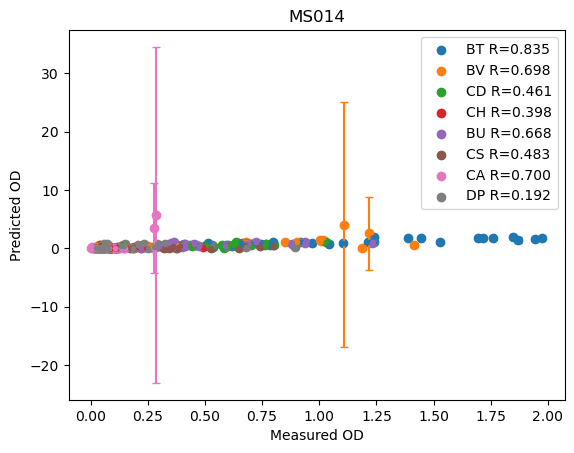

Total samples: 32, Updated regularization: 1.00e-03
Loss: 9.962, Residuals: -0.074
Loss: 4.798, Residuals: 0.095
Loss: 3.370, Residuals: 0.018
Loss: 3.244, Residuals: 0.062
Loss: 3.009, Residuals: 0.050
Loss: 2.619, Residuals: 0.027
Loss: 2.282, Residuals: -0.024
Loss: 2.177, Residuals: 0.002
Loss: 2.031, Residuals: -0.010
Loss: 2.023, Residuals: 0.020
Loss: 1.954, Residuals: 0.008
Loss: 1.941, Residuals: 0.029
Loss: 1.918, Residuals: 0.023
Loss: 1.916, Residuals: 0.030
Loss: 1.897, Residuals: 0.025
Loss: 1.867, Residuals: 0.016
Loss: 1.867, Residuals: 0.016
Loss: 1.852, Residuals: 0.011
Loss: 1.848, Residuals: 0.018
Loss: 1.841, Residuals: 0.014
Loss: 1.831, Residuals: 0.006
Loss: 1.829, Residuals: 0.014
Loss: 1.826, Residuals: 0.012
Loss: 1.823, Residuals: 0.013
Loss: 1.818, Residuals: 0.011
Loss: 1.817, Residuals: 0.016
Loss: 1.817, Residuals: 0.016
Evidence -206.758
Updating hyper-parameters...
Total samples: 32, Updated regularization: 1.42e-02
Loss: 8.601, Residuals: 0.013
Loss: 

Loss: 126.330, Residuals: -0.020
Evidence 420.435
Updating hyper-parameters...
Total samples: 33, Updated regularization: 5.16e-01
Loss: 129.415, Residuals: -0.022
Loss: 129.403, Residuals: -0.022
Evidence 421.506
Updating hyper-parameters...
Total samples: 33, Updated regularization: 5.55e-01
Loss: 130.386, Residuals: -0.025
Loss: 128.865, Residuals: -0.017
Loss: 128.736, Residuals: -0.025
Loss: 128.615, Residuals: -0.025
Loss: 128.493, Residuals: -0.022
Loss: 128.261, Residuals: -0.022
Loss: 128.254, Residuals: -0.023
Evidence 420.903
Fail count  1
Updating hyper-parameters...
Total samples: 33, Updated regularization: 7.02e-01
Loss: 129.811, Residuals: -0.025
Loss: 129.601, Residuals: -0.026
Loss: 129.211, Residuals: -0.026
Loss: 129.203, Residuals: -0.025
Evidence 423.739
Updating hyper-parameters...
Total samples: 33, Updated regularization: 7.81e-01
Loss: 130.427, Residuals: -0.028
Loss: 130.131, Residuals: -0.027
Loss: 129.986, Residuals: -0.025
Loss: 129.965, Residuals: -0.026


Total samples: 35, Updated regularization: 1.51e+00
Loss: 131.248, Residuals: 0.005
Loss: 131.193, Residuals: 0.003
Evidence 459.185
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.50e+00
Loss: 134.237, Residuals: 0.002
Loss: 133.675, Residuals: 0.003
Loss: 133.502, Residuals: 0.002
Loss: 133.200, Residuals: 0.003
Loss: 132.752, Residuals: 0.004
Loss: 132.750, Residuals: 0.004
Evidence 463.473
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.48e+00
Loss: 135.237, Residuals: 0.005
Loss: 134.963, Residuals: 0.006
Loss: 134.654, Residuals: 0.004
Loss: 134.653, Residuals: 0.004
Evidence 465.614
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.40e+00
Loss: 135.978, Residuals: 0.006
Loss: 135.893, Residuals: 0.004
Loss: 135.748, Residuals: 0.004
Loss: 135.748, Residuals: 0.004
Evidence 466.762
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.34e+00
Loss: 136.578, Residuals: 0.005
Loss: 136.48

Loss: 67.885, Residuals: 0.011
Loss: 67.547, Residuals: 0.011
Loss: 67.541, Residuals: 0.011
Evidence 413.198
Updating hyper-parameters...
Total samples: 36, Updated regularization: 5.50e-01
Loss: 109.963, Residuals: 0.008
Loss: 109.585, Residuals: 0.005
Loss: 109.509, Residuals: 0.006
Loss: 109.369, Residuals: 0.005
Loss: 109.148, Residuals: 0.005
Loss: 109.145, Residuals: 0.005
Evidence 455.249
Updating hyper-parameters...
Total samples: 36, Updated regularization: 7.42e-01
Loss: 131.186, Residuals: 0.004
Loss: 130.905, Residuals: 0.003
Loss: 130.824, Residuals: 0.002
Loss: 130.712, Residuals: 0.002
Loss: 130.703, Residuals: 0.004
Evidence 465.133
Updating hyper-parameters...
Total samples: 36, Updated regularization: 8.30e-01
Loss: 138.663, Residuals: 0.004
Loss: 138.561, Residuals: 0.002
Loss: 138.468, Residuals: 0.001
Loss: 138.459, Residuals: 0.002
Evidence 467.765
Updating hyper-parameters...
Total samples: 36, Updated regularization: 8.70e-01
Loss: 141.119, Residuals: 0.002
Los

Total samples: 36, Updated regularization: 4.85e-01
Loss: 108.627, Residuals: -0.005
Loss: 107.473, Residuals: 0.001
Loss: 107.461, Residuals: 0.002
Evidence 458.715
Updating hyper-parameters...
Total samples: 36, Updated regularization: 8.29e-01
Loss: 128.591, Residuals: -0.016
Loss: 127.016, Residuals: -0.008
Loss: 126.967, Residuals: -0.009
Evidence 476.560
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.13e+00
Loss: 137.304, Residuals: -0.015
Loss: 136.428, Residuals: -0.012
Loss: 136.420, Residuals: -0.012
Evidence 482.588
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.37e+00
Loss: 141.063, Residuals: -0.016
Loss: 140.837, Residuals: -0.016
Loss: 140.474, Residuals: -0.016
Loss: 140.410, Residuals: -0.018
Loss: 140.297, Residuals: -0.018
Loss: 140.154, Residuals: -0.018
Loss: 140.151, Residuals: -0.018
Evidence 484.983
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.62e+00
Loss: 142.219, Residuals: -0.0

Loss: 1.762, Residuals: -0.009
Loss: 1.762, Residuals: -0.009
Loss: 1.755, Residuals: -0.011
Loss: 1.755, Residuals: -0.010
Loss: 1.755, Residuals: -0.010
Loss: 1.754, Residuals: -0.009
Loss: 1.753, Residuals: -0.006
Loss: 1.743, Residuals: -0.007
Loss: 1.741, Residuals: -0.001
Loss: 1.739, Residuals: 0.001
Loss: 1.736, Residuals: 0.004
Loss: 1.736, Residuals: 0.006
Loss: 1.733, Residuals: 0.005
Loss: 1.729, Residuals: 0.003
Loss: 1.729, Residuals: 0.005
Loss: 1.727, Residuals: 0.006
Loss: 1.727, Residuals: 0.006
Loss: 1.724, Residuals: 0.005
Loss: 1.724, Residuals: 0.006
Loss: 1.722, Residuals: 0.005
Loss: 1.722, Residuals: 0.005
Loss: 1.722, Residuals: 0.005
Loss: 1.722, Residuals: 0.006
Loss: 1.720, Residuals: 0.005
Loss: 1.720, Residuals: 0.006
Loss: 1.720, Residuals: 0.007
Loss: 1.719, Residuals: 0.007
Loss: 1.719, Residuals: 0.007
Loss: 1.719, Residuals: 0.007
Loss: 1.719, Residuals: 0.006
Loss: 1.719, Residuals: 0.007
Loss: 1.718, Residuals: 0.007
Loss: 1.718, Residuals: 0.008
L

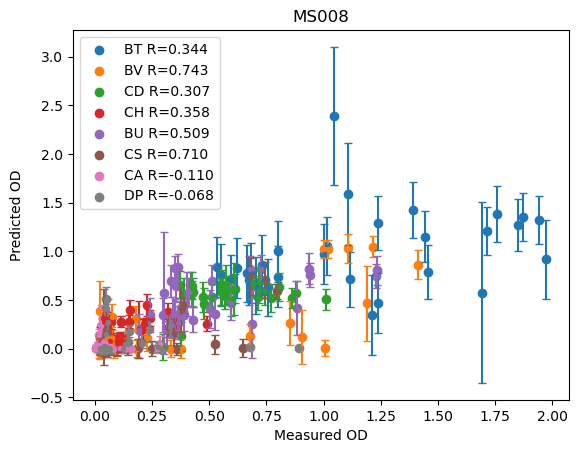

Total samples: 32, Updated regularization: 1.00e-03
Loss: 9.409, Residuals: -0.115
Loss: 4.658, Residuals: 0.094
Loss: 3.737, Residuals: 0.052
Loss: 2.747, Residuals: -0.019
Loss: 2.715, Residuals: -0.007
Loss: 2.655, Residuals: -0.004
Loss: 2.552, Residuals: -0.000
Loss: 2.377, Residuals: -0.008
Loss: 2.325, Residuals: 0.038
Loss: 2.239, Residuals: 0.022
Loss: 2.234, Residuals: 0.043
Loss: 2.188, Residuals: 0.033
Loss: 2.114, Residuals: 0.016
Loss: 2.112, Residuals: 0.032
Loss: 2.093, Residuals: 0.027
Loss: 2.075, Residuals: 0.031
Loss: 2.045, Residuals: 0.023
Loss: 2.045, Residuals: 0.030
Loss: 2.022, Residuals: 0.021
Loss: 2.017, Residuals: 0.024
Loss: 2.007, Residuals: 0.019
Loss: 1.992, Residuals: 0.011
Loss: 1.990, Residuals: 0.020
Loss: 1.975, Residuals: 0.012
Loss: 1.973, Residuals: 0.019
Loss: 1.973, Residuals: 0.021
Loss: 1.960, Residuals: 0.018
Loss: 1.960, Residuals: 0.018
Loss: 1.959, Residuals: 0.020
Loss: 1.957, Residuals: 0.020
Loss: 1.945, Residuals: 0.018
Loss: 1.945,

Loss: 130.935, Residuals: 0.009
Loss: 130.922, Residuals: 0.010
Loss: 130.897, Residuals: 0.010
Loss: 130.895, Residuals: 0.009
Evidence 413.992
Pass count  1
Total samples: 35, Updated regularization: 1.00e-03
Loss: 10.168, Residuals: -0.157
Loss: 5.316, Residuals: 0.051
Loss: 3.880, Residuals: 0.012
Loss: 2.977, Residuals: -0.014
Loss: 2.904, Residuals: 0.024
Loss: 2.772, Residuals: 0.013
Loss: 2.552, Residuals: 0.002
Loss: 2.406, Residuals: -0.005
Loss: 2.380, Residuals: 0.010
Loss: 2.334, Residuals: -0.005
Loss: 2.270, Residuals: -0.027
Loss: 2.268, Residuals: -0.019
Loss: 2.244, Residuals: -0.029
Loss: 2.206, Residuals: -0.041
Loss: 2.204, Residuals: -0.035
Loss: 2.200, Residuals: -0.036
Loss: 2.171, Residuals: -0.045
Loss: 2.165, Residuals: -0.034
Loss: 2.155, Residuals: -0.038
Loss: 2.140, Residuals: -0.039
Loss: 2.136, Residuals: -0.029
Loss: 2.107, Residuals: -0.038
Loss: 2.105, Residuals: -0.040
Loss: 2.103, Residuals: -0.038
Loss: 2.098, Residuals: -0.033
Loss: 2.092, Residu

Total samples: 35, Updated regularization: 8.88e-01
Loss: 136.260, Residuals: -0.013
Evidence 462.690
Updating hyper-parameters...
Total samples: 35, Updated regularization: 8.95e-01
Loss: 136.692, Residuals: -0.013
Loss: 136.329, Residuals: -0.014
Loss: 136.329, Residuals: -0.014
Evidence 463.285
Updating hyper-parameters...
Total samples: 35, Updated regularization: 9.13e-01
Loss: 136.257, Residuals: -0.016
Loss: 136.238, Residuals: -0.018
Evidence 464.178
Updating hyper-parameters...
Total samples: 35, Updated regularization: 9.51e-01
Loss: 136.463, Residuals: -0.016
Evidence 464.490
Pass count  1
Total samples: 35, Updated regularization: 1.00e-03
Loss: 9.782, Residuals: -0.180
Loss: 5.257, Residuals: 0.027
Loss: 4.039, Residuals: 0.010
Loss: 3.582, Residuals: -0.013
Loss: 2.932, Residuals: 0.001
Loss: 2.717, Residuals: -0.012
Loss: 2.701, Residuals: -0.006
Loss: 2.562, Residuals: -0.009
Loss: 2.446, Residuals: 0.002
Loss: 2.410, Residuals: 0.013
Loss: 2.355, Residuals: 0.006
Loss:

Total samples: 36, Updated regularization: 1.61e-02
Loss: 9.577, Residuals: -0.015
Loss: 9.510, Residuals: -0.026
Loss: 9.407, Residuals: -0.012
Loss: 9.342, Residuals: 0.006
Loss: 9.337, Residuals: -0.002
Loss: 9.330, Residuals: -0.001
Loss: 9.330, Residuals: 0.001
Evidence 111.757
Updating hyper-parameters...
Total samples: 36, Updated regularization: 5.82e-02
Loss: 30.229, Residuals: 0.008
Loss: 30.122, Residuals: 0.003
Loss: 30.060, Residuals: 0.001
Loss: 29.961, Residuals: 0.004
Loss: 29.953, Residuals: 0.005
Loss: 29.884, Residuals: 0.006
Loss: 29.883, Residuals: 0.008
Evidence 297.054
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.99e-01
Loss: 69.660, Residuals: 0.028
Loss: 69.340, Residuals: 0.016
Loss: 68.807, Residuals: 0.007
Loss: 68.752, Residuals: 0.010
Evidence 409.994
Updating hyper-parameters...
Total samples: 36, Updated regularization: 5.50e-01
Loss: 109.015, Residuals: 0.007
Loss: 108.758, Residuals: 0.010
Loss: 108.307, Residuals: 0.010
Lo

Loss: 9.858, Residuals: -0.186
Loss: 4.998, Residuals: 0.045
Loss: 3.787, Residuals: 0.023
Loss: 2.723, Residuals: -0.041
Loss: 2.698, Residuals: -0.025
Loss: 2.649, Residuals: -0.021
Loss: 2.562, Residuals: -0.013
Loss: 2.405, Residuals: -0.011
Loss: 2.164, Residuals: -0.001
Loss: 2.111, Residuals: 0.014
Loss: 2.021, Residuals: 0.004
Loss: 2.014, Residuals: 0.024
Loss: 1.957, Residuals: 0.005
Loss: 1.940, Residuals: 0.001
Loss: 1.912, Residuals: -0.008
Loss: 1.875, Residuals: -0.027
Loss: 1.873, Residuals: -0.023
Loss: 1.856, Residuals: -0.025
Loss: 1.833, Residuals: -0.034
Loss: 1.832, Residuals: -0.027
Loss: 1.830, Residuals: -0.027
Loss: 1.828, Residuals: -0.028
Loss: 1.823, Residuals: -0.030
Loss: 1.822, Residuals: -0.030
Loss: 1.816, Residuals: -0.033
Loss: 1.816, Residuals: -0.030
Loss: 1.810, Residuals: -0.034
Loss: 1.810, Residuals: -0.034
Loss: 1.810, Residuals: -0.034
Loss: 1.810, Residuals: -0.032
Loss: 1.807, Residuals: -0.034
Loss: 1.807, Residuals: -0.034
Evidence -229.7

Total samples: 36, Updated regularization: 4.68e-01
Loss: 140.727, Residuals: 0.007
Evidence 476.283
Updating hyper-parameters...
Total samples: 36, Updated regularization: 4.76e-01
Loss: 142.290, Residuals: 0.013
Loss: 142.172, Residuals: 0.008
Loss: 141.945, Residuals: 0.009
Loss: 141.537, Residuals: 0.010
Loss: 140.928, Residuals: 0.013
Loss: 140.821, Residuals: 0.015
Loss: 140.790, Residuals: 0.015
Loss: 140.511, Residuals: 0.015
Loss: 140.113, Residuals: 0.017
Loss: 140.101, Residuals: 0.016
Evidence 479.305
Updating hyper-parameters...
Total samples: 36, Updated regularization: 5.13e-01
Loss: 142.699, Residuals: 0.020
Loss: 142.527, Residuals: 0.019
Loss: 142.313, Residuals: 0.019
Loss: 142.309, Residuals: 0.019
Evidence 481.268
Updating hyper-parameters...
Total samples: 36, Updated regularization: 5.21e-01
Loss: 143.460, Residuals: 0.021
Evidence 482.066
Updating hyper-parameters...
Total samples: 36, Updated regularization: 5.22e-01
Loss: 143.902, Residuals: 0.020
Loss: 143.89

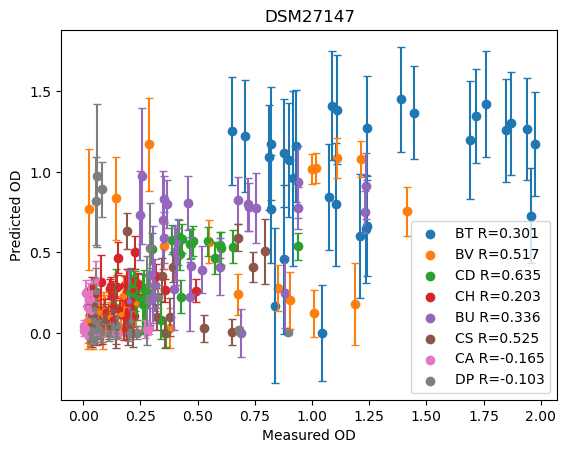

In [4]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=10, shuffle=True, random_state=21)

    # keep track of all predictions
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(dfs):
        #train_index, test_index = next(iter(kf.split(dfs)))

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit()

        # plot fitness to data
        pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        strain = file.split("_")[1]
        kfold_df = pd.DataFrame()
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_10fold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_10fold.pdf", dpi=300)
    plt.show()

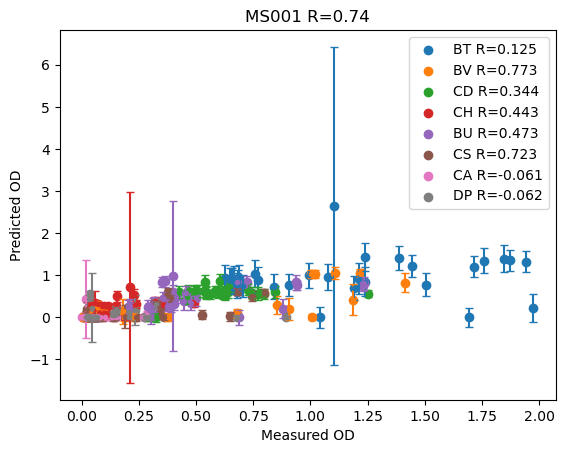

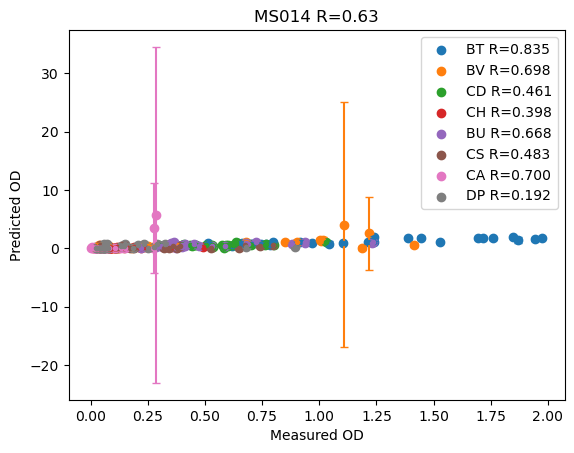

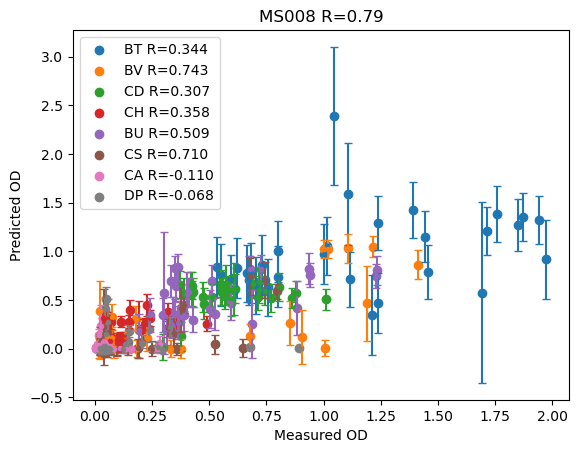

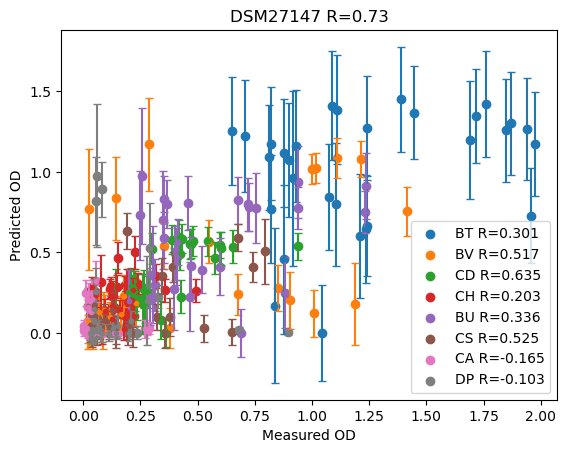

In [4]:
for file in files:
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]
    
    strain = file.split("_")[1]
    kfold_df = pd.read_csv(f"kfold/{strain}_10fold.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.savefig(f"figures/{strain}_10fold.pdf", dpi=300)
    plt.show()